In [ ]:
!pip install yfinance -q
!pip install pandas -q
!pip install numpy -q
!pip install scipy -q

In [3]:
import time
import pandas as pd
import yfinance as yf
import numpy as np
import scipy.optimize as optimize
import scipy.interpolate as sci
import matplotlib.pyplot as plt 

# USE VPN IF YOU ARE from CIS country

In [4]:
def fetch_data(assets: list) -> pd.DataFrame:
    
    df = pd.DataFrame()
    
    for asset in assets:
        temp = yf.download(asset, start='2000-01-01', end='2023-08-27')
        
        temp.columns = [f"{asset}_{col}" for col in temp.columns]
        
        if df.empty:
            df = temp
        else:
            df = df.merge(temp, how='outer', left_index=True, right_index=True)
    
    df.dropna(inplace=True)
    
    return df

assets = ['AAPL', 'MSFT', 'GOOGL']
data = fetch_data(assets)
print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
            AAPL_Open  AAPL_High  AAPL_Low  AAPL_Close  AAPL_Adj Close  \
Date                                                                     
2004-08-19   0.562679   0.568929  0.542143    0.548393        0.465474   
2004-08-20   0.548393   0.553393  0.544464    0.550000        0.466838   
2004-08-23   0.551071   0.558393  0.546429    0.555000        0.471082   
2004-08-24   0.558214   0.570536  0.556964    0.570536        0.484269   
2004-08-25   0.569107   0.591964  0.566607    0.590179        0.500942   

            AAPL_Volume  MSFT_Open  MSFT_High   MSFT_Low  MSFT_Close  \
Date                                                                   
2004-08-19    388920000  27.350000  27.450001  27.010000   27.120001   
2004-08-20    316780800  27.129999  27.370001  27.040001  

In [5]:
df = fetch_data (['TLT','GLD','SPY','QQQ','VWO'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
df.columns

Index(['TLT_Open', 'TLT_High', 'TLT_Low', 'TLT_Close', 'TLT_Adj Close',
       'TLT_Volume', 'GLD_Open', 'GLD_High', 'GLD_Low', 'GLD_Close',
       'GLD_Adj Close', 'GLD_Volume', 'SPY_Open', 'SPY_High', 'SPY_Low',
       'SPY_Close', 'SPY_Adj Close', 'SPY_Volume', 'QQQ_Open', 'QQQ_High',
       'QQQ_Low', 'QQQ_Close', 'QQQ_Adj Close', 'QQQ_Volume', 'VWO_Open',
       'VWO_High', 'VWO_Low', 'VWO_Close', 'VWO_Adj Close', 'VWO_Volume'],
      dtype='object')

In [7]:
features = [f for f in df.columns if "Adj" in f]
print(features)

['TLT_Adj Close', 'GLD_Adj Close', 'SPY_Adj Close', 'QQQ_Adj Close', 'VWO_Adj Close']


In [8]:
adj_closes = df[features]
list(adj_closes)

['TLT_Adj Close',
 'GLD_Adj Close',
 'SPY_Adj Close',
 'QQQ_Adj Close',
 'VWO_Adj Close']

<Axes: xlabel='Date'>

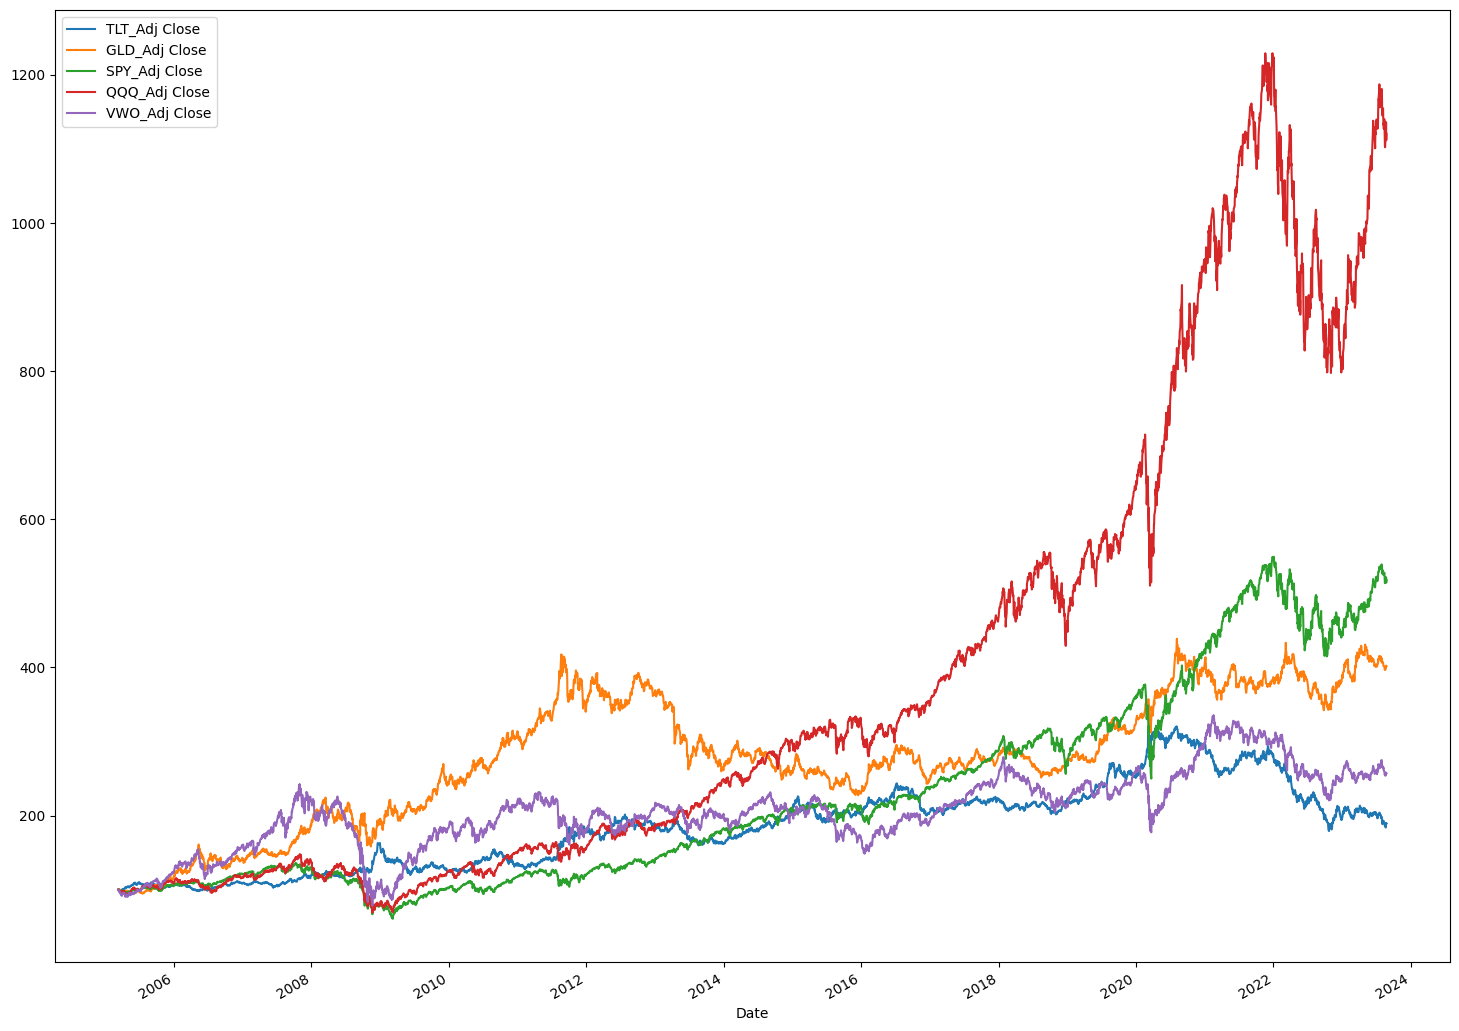

In [9]:
(adj_closes/adj_closes.iloc[0]*100).plot(figsize=(18,14))

In [10]:
returns = np.log(adj_closes/adj_closes.shift(1))
returns.mean()

TLT_Adj Close    0.000137
GLD_Adj Close    0.000299
SPY_Adj Close    0.000354
QQQ_Adj Close    0.000520
VWO_Adj Close    0.000203
dtype: float64

In [11]:
returns.mean() * 252

TLT_Adj Close    0.034583
GLD_Adj Close    0.075428
SPY_Adj Close    0.089208
QQQ_Adj Close    0.131034
VWO_Adj Close    0.051126
dtype: float64

In [12]:
returns.cov()

,TLT_Adj Close,GLD_Adj Close,SPY_Adj Close,QQQ_Adj Close,VWO_Adj Close
TLT_Adj Close,0.000086,0.000017,-0.000040,-0.000038,-0.000049
GLD_Adj Close,0.000017,0.000126,0.000007,0.000006,0.000034
SPY_Adj Close,-0.000040,0.000007,0.000151,0.000156,0.000175
QQQ_Adj Close,-0.000038,0.000006,0.000156,0.000190,0.000181
VWO_Adj Close,-0.000049,0.000034,0.000175,0.000181,0.000296


In [13]:
returns.cov() * 252

,TLT_Adj Close,GLD_Adj Close,SPY_Adj Close,QQQ_Adj Close,VWO_Adj Close
TLT_Adj Close,0.021736,0.004272,-0.010127,-0.009500,-0.012369
GLD_Adj Close,0.004272,0.031740,0.001800,0.001422,0.008548
SPY_Adj Close,-0.010127,0.001800,0.038090,0.039210,0.044038
QQQ_Adj Close,-0.009500,0.001422,0.039210,0.047908,0.045594
VWO_Adj Close,-0.012369,0.008548,0.044038,0.045594,0.074511


In [14]:
weights = np.random.dirichlet(np.ones(len(features)), size=1)
weights = weights[0]
print(weights)

[0.18159913 0.17810329 0.56735211 0.06315172 0.00979375]


In [15]:
exp_port_return = np.sum(returns.mean()*weights)*252
print(exp_port_return)

0.07910206841424648


In [16]:
port_var = np.dot(weights.T, np.dot(returns.cov()*252, weights))
port_vol = np.sqrt(port_var)
print(port_var)
print(port_vol)

0.015891194640802644
0.1260602817734541


In [17]:
def portfolio_simulation(assets: list, iterations: int) -> [np.array, np.array]:
    start = time.time()
    num_assets = len(assets)
    
    df = fetch_data(assets)
    features = [f for f in list(df) if "Adj" in f]
    adj_closes = df[features]
    returns = np.log(adj_closes / adj_closes.shift(1))
    
    port_returns = []
    port_vols = []
    
    for i in range (iterations):
        weights = np.random.dirichlet(np.ones(num_assets),size=1)
        weights = weights[0]
        port_returns.append(np.sum(returns.mean() * weights) * 252)
        port_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    
    port_returns = np.array(port_returns)
    port_vols = np.array(port_vols)
 
    
    plt.figure(figsize = (18,10))
    plt.scatter(port_vols,port_returns,c = (port_returns / port_vols), marker='o')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio (not adjusted for short rate)')
    
    print('Elapsed Time: %.2f seconds' % (time.time() - start))
    
    return port_returns, port_vols

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Elapsed Time: 15.22 seconds


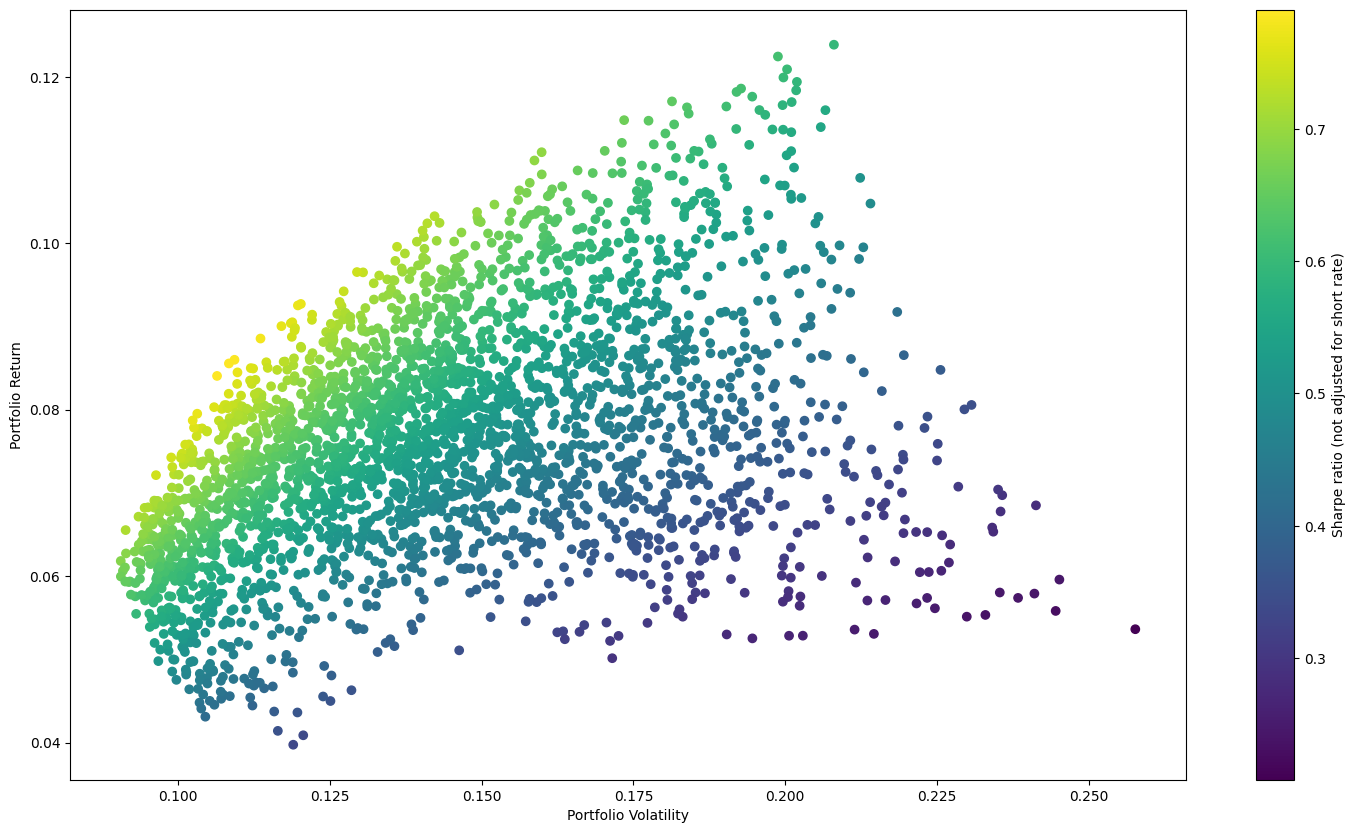

In [18]:
assets = ['TLT','GLD','SPY','QQQ','VWO']
port_returns, port_vols = portfolio_simulation(assets, 3000)

In [19]:
def portfolio_stats(weights: np.array, returns: pd.DataFrame) -> dict:
    rf = 0.01
    weights = np.array(weights)
    port_return = np.sum(returns.mean() * weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe = (port_return - rf)/port_vol

    return {'return': port_return, 'volatility': port_vol, 'sharpe': sharpe}

In [20]:
def minimize_sharpe(weights):  
    return -portfolio_stats(weights, returns)['sharpe'] 
def minimize_volatility(weights):  
    return portfolio_stats(weights, returns)['volatility'] 
def minimize_return(weights): 
    return -portfolio_stats(weights, returns)['return']

In [21]:
num_assets = len(assets)
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(num_assets))
initializer = num_assets * [1./num_assets,]

print (initializer)
print (bounds)

[0.2, 0.2, 0.2, 0.2, 0.2]
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))


In [22]:
optimal_sharpe=optimize.minimize(minimize_sharpe,
                                 initializer,
                                 method = 'SLSQP',
                                 bounds = bounds,
                                 constraints = constraints)
print(optimal_sharpe)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.713091569125298
       x: [ 3.128e-01  2.506e-01  0.000e+00  4.366e-01  0.000e+00]
     nit: 5
     jac: [-9.255e-02 -9.197e-02  5.558e-02 -9.321e-02  6.400e-01]
    nfev: 30
    njev: 5


In [23]:
optimal_sharpe_weights=optimal_sharpe['x'].round(4)
list(zip(assets,list(optimal_sharpe_weights)))

[('TLT', 0.3128), ('GLD', 0.2506), ('SPY', 0.0), ('QQQ', 0.4366), ('VWO', 0.0)]

In [24]:
optimal_stats = portfolio_stats(optimal_sharpe_weights, returns)
print(optimal_stats)

print('Optimal Portfolio Return: ', round(optimal_stats['return']*100,4))
print('Optimal Portfolio Volatility: ', round(optimal_stats['volatility']*100,4))
print('Optimal Portfolio Sharpe Ratio: ', round(optimal_stats['sharpe'],4))

{'return': 0.08692904211676995, 'volatility': 0.1078810186663637, 'sharpe': 0.7130915435150199}
Optimal Portfolio Return:  8.6929
Optimal Portfolio Volatility:  10.7881
Optimal Portfolio Sharpe Ratio:  0.7131


In [25]:
optimal_variance=optimize.minimize(minimize_volatility,
                                   initializer,
                                   method = 'SLSQP',
                                   bounds = bounds,
                                   constraints = constraints)

print(optimal_variance)
optimal_variance_weights=optimal_variance['x'].round(4)
list(zip(assets,list(optimal_variance_weights)))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.08990620698942682
       x: [ 4.953e-01  1.701e-01  3.346e-01  0.000e+00  0.000e+00]
     nit: 11
     jac: [ 9.015e-02  9.029e-02  8.935e-02  9.626e-02  1.119e-01]
    nfev: 66
    njev: 11


[('TLT', 0.4953), ('GLD', 0.1701), ('SPY', 0.3346), ('QQQ', 0.0), ('VWO', 0.0)]

In [26]:
target_returns = np.linspace(port_returns.min(),port_returns.max(),50)
minimal_volatilities = []
bounds = tuple((0,1) for x in weights)
initializer = num_assets * [1./num_assets,]

for target_return in target_returns:
    
    constraints = ({'type':'eq','fun': lambda x: portfolio_stats(x, returns)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1})
       
    optimal = optimize.minimize(minimize_volatility,
                              initializer,
                              method = 'SLSQP',
                              bounds = bounds,
                              constraints = constraints)
    
    minimal_volatilities.append(optimal['fun'])

minimal_volatilities = np.array(minimal_volatilities)

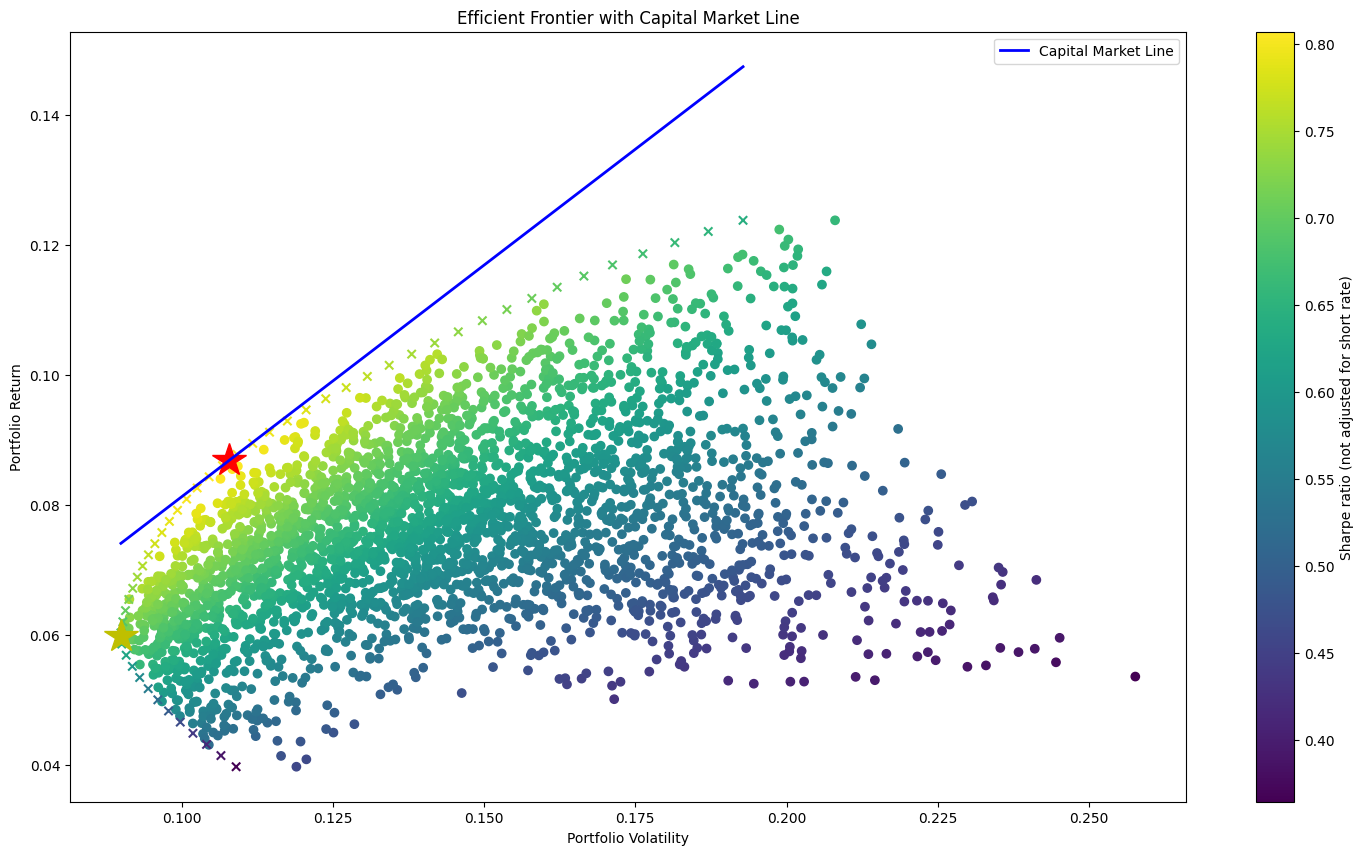

In [27]:
min_index = np.argmin(minimal_volatilities)
ex_returns = target_returns[min_index:]
ex_volatilities = minimal_volatilities[min_index:]
# initialize figure size
plt.figure(figsize=(18,10))

plt.scatter(port_vols,
            port_returns,
            c = (port_returns / port_vols),
            marker = 'o')

plt.scatter(minimal_volatilities,
            target_returns,
            c = (target_returns / minimal_volatilities),
            marker = 'x')

plt.plot(portfolio_stats(optimal_sharpe_weights, returns)['volatility'],
         portfolio_stats(optimal_sharpe_weights, returns)['return'],
         'r*',
         markersize = 25.0)

plt.plot(portfolio_stats(optimal_variance_weights, returns)['volatility'],
         portfolio_stats(optimal_variance_weights, returns)['return'],
         'y*',
         markersize = 25.0)

plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe ratio (not adjusted for short rate)')

optimal_sharpe_ratio = portfolio_stats(optimal_sharpe_weights, returns)['sharpe']

cml_volatility_range = np.linspace(min(ex_volatilities), max(ex_volatilities), num=100)

# Calculate corresponding portfolio returns on the CML
rfr = 0.01
cml_returns = optimal_sharpe_ratio * cml_volatility_range + rfr

# Plotting the Capital Market Line
plt.plot(cml_volatility_range, cml_returns, 'b-', linewidth=2.0, label='Capital Market Line')
# Rest of your existing plotting code ...

plt.legend()
plt.title('Efficient Frontier with Capital Market Line')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.show()

# To get true optimal, we need to solve CML equasion

In [28]:
min_index = np.argmin(minimal_volatilities)
ex_returns = target_returns[min_index:]
ex_volatilities = minimal_volatilities[min_index:]

var = sci.splrep(ex_returns, ex_volatilities)

def func(x):
    spline_approx = sci.splev(x,var,der=0)  
    return spline_approx

def d_func(x):
    deriv = sci.splev(x,var,der=1)
    return deriv

def eqs(p, rfr = 0.01):

    #rfr = risk free rate
    
    eq1 = rfr - p[0]
    eq2 = rfr + p[1] * p[2] - func(p[2])
    eq3=p[1] - d_func(p[2]) 
    return eq1, eq2, eq3

m=  port_vols.max() / 2
l = port_returns.max() / 2

optimal = optimize.fsolve(eqs, [rfr,m,l])
print(optimal)

[0.01       1.11957651 0.08305921]


In [29]:
constraints =(
    {'type':'eq','fun': lambda x: portfolio_stats(x, returns)['return']-func(optimal[2])},
    {'type':'eq','fun': lambda x: np.sum(x)-1},
    )

result = optimize.minimize(minimize_volatility,
                           initializer,
                           method = 'SLSQP',
                           bounds = bounds,
                           constraints = constraints)

optimal_weights = result['x'].round(3)

portfolio = list(zip(assets, list(optimal_weights)))
print(portfolio)

[('TLT', 0.123), ('GLD', 0.292), ('SPY', 0.0), ('QQQ', 0.586), ('VWO', 0.0)]
